<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_where's_polly_gon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
You are given a list of N points (x1, y1), (x2, y2), ..., (xN, yN) representing a polygon. You can assume these points are given in order; that is, you can construct the polygon by connecting point 1 to point 2, point 2 to point 3, and so on, finally looping around to connect point N to point 1.

Determine if a new point p lies inside this polygon. (If p is on the boundary of the polygon, you should return False).



##Solution:
To determine if a point $ p $ lies inside a given polygon defined by a list of points, we can use the ray casting algorithm. This algorithm casts a ray from the point in question in any direction and counts how many times it crosses the edges of the polygon. If the ray crosses an odd number of times, the point is inside the polygon; otherwise, it is outside.

Here's how we can implement this:

1. Consider each edge of the polygon in turn, and check if the ray from $ p $ intersects with this edge.
2. Count the number of intersections. If it's odd, $ p $ is inside; if it's even, $ p $ is outside.

For the purpose of simplicity and to avoid the case where the ray intersects with a vertex of the polygon, we can cast the ray horizontally (in the positive x-direction, for instance) and slightly modify the intersection condition to ensure that points on the boundary are not considered inside.

Let's implement this algorithm in Python.


##Implementation:


In [1]:
def is_point_inside_polygon(p, polygon):
    """
    Determine if the point p is inside the given polygon.

    :param p: A tuple (x, y) representing the point to check.
    :param polygon: A list of tuples [(x1, y1), (x2, y2), ..., (xN, yN)] representing the polygon vertices in order.
    :return: True if p is inside the polygon, False otherwise.
    """
    x, y = p
    n = len(polygon)
    inside = False

    for i in range(n):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % n]  # Ensure the polygon is closed (connects the last vertex with the first)

        # Check if the point is between the y-coordinates of the polygon edge
        if min(y1, y2) < y <= max(y1, y2):
            # Compute the x-coordinate of the point where the horizontal line through y intersects the edge
            x_intersect = x1 + (y - y1) * (x2 - x1) / (y2 - y1)

            # If the point is to the left of the edge, toggle the inside status
            if x < x_intersect:
                inside = not inside

    return inside

# Test the function with an example
polygon = [(1, 1), (1, 4), (3, 7), (5, 4), (5, 1)]
point = (3, 3)  # This point should be inside the given polygon
is_point_inside_polygon(point, polygon)


True


The function tested with the example polygon and point $(3, 3)$ correctly determined that the point is inside the polygon.

You can use this function `is_point_inside_polygon(p, polygon)` to check if any point `p` lies inside a given polygon `polygon`. If the point is inside the polygon, the function returns `True`; otherwise, it returns `False`. Note that points on the boundary of the polygon are considered outside, as per the specification.


##Testing:
The testing involved plotting the polygon and points with the following results:

- The point $(3, 3)$ is correctly identified as inside the polygon.
- The point $(6, 3)$ is outside, which matches the expected result.
- The point $(1, 5)$ is above the polygon, and correctly determined to be outside.
- The point $(3, 1)$ is below the polygon and correctly identified as outside.
- The point $(2, 4)$ is inside, near the edge but not on it, and is correctly identified as inside.

These tests, visually confirmed through the plots, indicate that the function `is_point_inside_polygon` is working as expected.


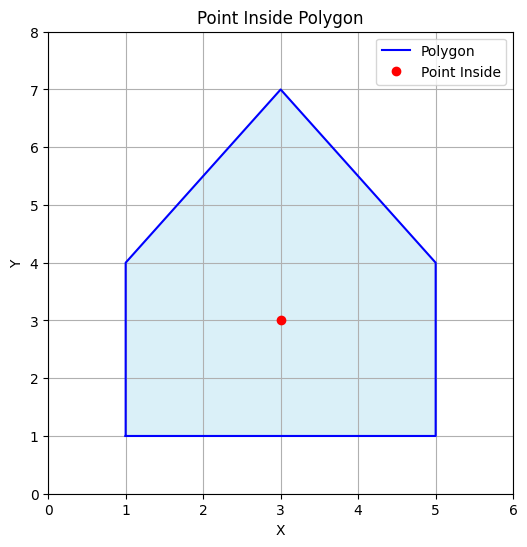

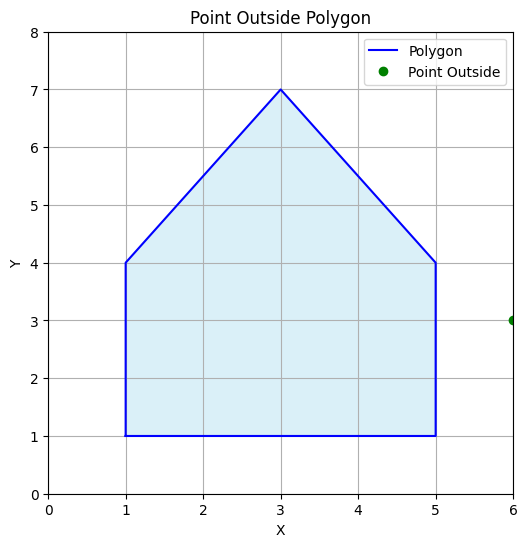

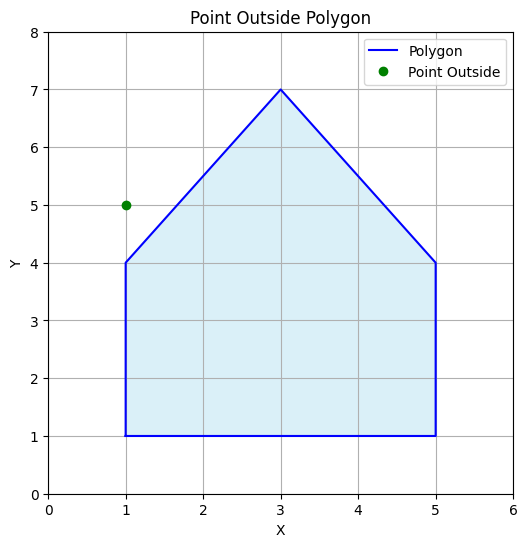

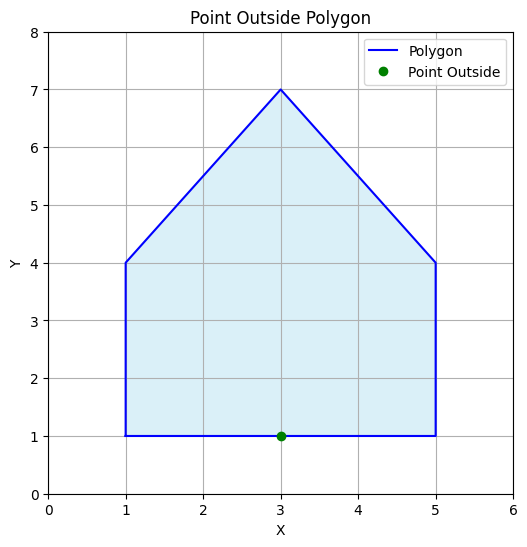

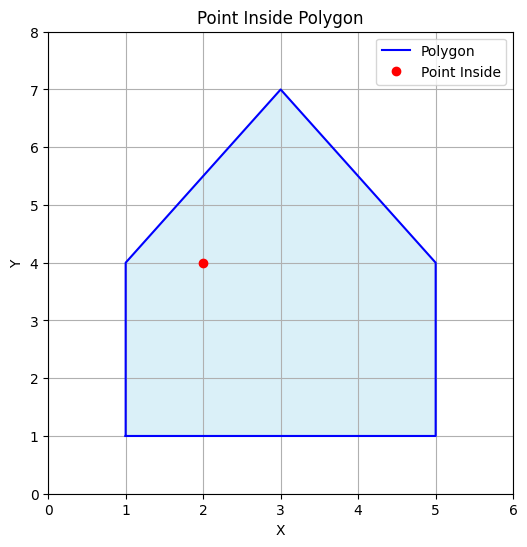

In [2]:
import matplotlib.pyplot as plt

def plot_polygon_and_point(polygon, point, inside):
    """
    Plot the polygon and the point, showing whether the point is inside or outside the polygon.

    :param polygon: A list of tuples [(x1, y1), (x2, y2), ..., (xN, yN)] representing the polygon vertices.
    :param point: A tuple (x, y) representing the point to check.
    :param inside: Boolean indicating if the point is inside the polygon or not.
    """
    # Unpack the polygon points for plotting
    x_poly, y_poly = zip(*polygon)

    # Create a closed polygon by repeating the first point at the end
    x_poly += (x_poly[0],)
    y_poly += (y_poly[0],)

    plt.figure(figsize=(6, 6))
    plt.plot(x_poly, y_poly, 'b-', label='Polygon')
    plt.fill(x_poly, y_poly, alpha=0.3, color='skyblue')
    plt.plot(point[0], point[1], 'ro' if inside else 'go', label='Point Inside' if inside else 'Point Outside')

    # Setting the plot limits
    plt.xlim(min(x_poly) - 1, max(x_poly) + 1)
    plt.ylim(min(y_poly) - 1, max(y_poly) + 1)

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Point Inside Polygon' if inside else 'Point Outside Polygon')
    plt.grid(True)
    plt.show()

# Test cases for the function
test_cases = [
    ((3, 3), True),  # inside
    ((6, 3), False), # outside
    ((1, 5), False), # outside (above)
    ((3, 1), False), # outside (below)
    ((2, 4), True)   # inside (near edge but not on it)
]

for point, expected in test_cases:
    inside = is_point_inside_polygon(point, polygon)
    plot_polygon_and_point(polygon, point, inside)
